In [1]:
import numpy as np  
import pandas as pd 

#LOAD DATA CSV FILE
deliver=pd.read_csv('datasets/deliver_data.csv', header=0)
deliver

,id,dostawca,hours,loc,price
0,1,GPS,NaN,NaN,NaN
1,2,INpost,9.0,Poland,142.07
2,3,DPD,15.0,Czech Republic,269.49
3,4,INpost,18.0,Poland,370.56
4,5,DPD,9.0,Poland,476.16
...,...,...,...,...,...
195,196,INpost,5.0,Poland,134.52
196,197,GPS,24.0,Czech Republic,231.79
197,198,DPD,8.0,Poland,113.53
198,199,GPS,13.0,Poland,65.49


In [2]:
#cleaning - missing data check

missing_data_counts=pd.DataFrame(deliver.isnull().sum(),columns=['MissingValues'])
missing_data_counts

,MissingValues
id,0
dostawca,0
hours,11
loc,11
price,11


In [4]:
#cleaning- drop NaN data to avoid failure 
deliver.dropna(inplace=True)
deliver

,id,dostawca,hours,loc,price
1,2,INpost,9.0,Poland,142.07
2,3,DPD,15.0,Czech Republic,269.49
3,4,INpost,18.0,Poland,370.56
4,5,DPD,9.0,Poland,476.16
5,6,INpost,19.0,Czech Republic,293.67
...,...,...,...,...,...
195,196,INpost,5.0,Poland,134.52
196,197,GPS,24.0,Czech Republic,231.79
197,198,DPD,8.0,Poland,113.53
198,199,GPS,13.0,Poland,65.49


In [11]:
#cleaning - remove id column after dropna and set index


del deliver['id']
deliver



,dostawca,hours,loc,price
1,INpost,9.0,Poland,142.07
2,DPD,15.0,Czech Republic,269.49
3,INpost,18.0,Poland,370.56
4,DPD,9.0,Poland,476.16
5,INpost,19.0,Czech Republic,293.67
...,...,...,...,...
195,INpost,5.0,Poland,134.52
196,GPS,24.0,Czech Republic,231.79
197,DPD,8.0,Poland,113.53
198,GPS,13.0,Poland,65.49


In [14]:
#analysis group by deliver company basic stats

grouped=deliver.groupby('dostawca')
grouped.describe()

hours                                                    price  \
         count       mean       std  min   25%   50%    75%   max count   
dostawca                                                                  
DPD       64.0  13.562500  6.819382  2.0  7.75  14.0  19.25  24.0  64.0   
GPS       54.0  12.925926  7.000948  1.0  6.00  13.0  19.00  24.0  54.0   
INpost    71.0  12.845070  6.923352  1.0  8.00  13.0  18.50  24.0  71.0   

                                                                              
                mean         std    min       25%      50%       75%     max  
dostawca                                                                      
DPD       273.540781  127.069571  60.60  162.5775  255.195  381.8625  499.58  
GPS       309.407037  126.834469  61.16  198.1450  331.830  397.1225  497.28  
INpost    257.179014  121.805192  60.67  149.1250  245.730  366.6450  484.77

In [20]:
#analysis location group - deliver company (average price and hours )

pd.pivot_table(deliver,index=['loc','dostawca'],values=['hours','price'] )

hours       price
loc            dostawca                       
Austria        GPS       17.000000  179.740000
Czech Republic DPD       12.619048  255.031905
               GPS       14.217391  303.921304
               INpost    12.346154  229.301538
Germany        DPD        5.500000  156.475000
               GPS        9.333333  153.810000
               INpost    10.500000  178.635000
Poland         DPD       14.439024  288.731463
               GPS       12.074074  336.171111
               INpost    13.255814  277.688372

In [15]:
#analysis Stats Correlation

deliver.corr()

,hours,price
hours,1.000000,-0.054215
price,-0.054215,1.000000


In [17]:
#analysis Regression without intercept

import statsmodels.formula.api as sm  
result=sm.ols(formula='hours~price-1',data=deliver).fit()
result.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  hours   R-squared (uncentered):                   0.634
Model:                            OLS   Adj. R-squared (uncentered):              0.633
Method:                 Least Squares   F-statistic:                              326.3
Date:                Mon, 11 Jan 2021   Prob (F-statistic):                    5.97e-43
Time:                        23:22:34   Log-Likelihood:                         -682.34
No. Observations:                 189   AIC:                                      1367.
Df Residuals:                     188   BIC:                                      1370.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
price          0.0387      0.002     18.065      0.000       0.034       0.043
==============================================================================
Omnibus:                       20.748   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.282
Skew:                          -0.177   Prob(JB):                       0.0262
Kurtosis:                       2.106   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='dostawca'>

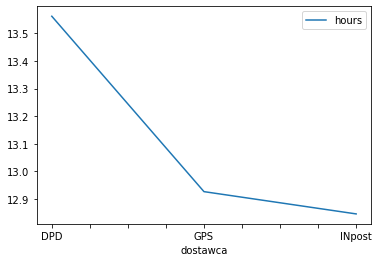

In [27]:
#visualization

import matplotlib.pyplot as plt 

grouped_mean=deliver.groupby('dostawca').mean()

del grouped_mean['price']
grouped_mean.plot()